-0.00000000,
-0.00000508,
-0.00000765,
0.00000000,
0.00001726,
0.00003227,
0.00002890,
-0.00000000,
-0.00004268,
-0.00007128,
-0.00005869,
-0.00000000,
0.00007702,
0.00012316,
0.00009778,
-0.00000000,
-0.00012105,
-0.00018904,
-0.00014696,
0.00000000,
0.00017560,
0.00027010,
0.00020710,
0.00000000,
-0.00024155,
-0.00036759,
-0.00027909,
-0.00000000,
0.00031984,
0.00048290,
0.00036394,
-0.00000000,
-0.00041151,
-0.00061752,
-0.00046272,
0.00000000,
0.00051771,
0.00077312,
0.00057666,
-0.00000000,
-0.00063974,
-0.00095160,
-0.00070714,
-0.00000000,
0.00077907,
0.00115513,
0.00085575,
-0.00000000,
-0.00093743,
-0.00138624,
-0.00102437,
0.00000000,
0.00111686,
0.00164796,
0.00121522,
-0.00000000,
-0.00131982,
-0.00194394,
-0.00143104,
-0.00000000,
0.00154932,
0.00227867,
0.00167516,
-0.00000000,
-0.00180911,
-0.00265777,
-0.00195181,
0.00000000,
0.00210396,
0.00308840,
0.00226638,
-0.00000000,
-0.00244000,
-0.00357985,
-0.00262589,
-0.00000000,
0.00282532,
0.00414442,
0.00303972,
-0.000000

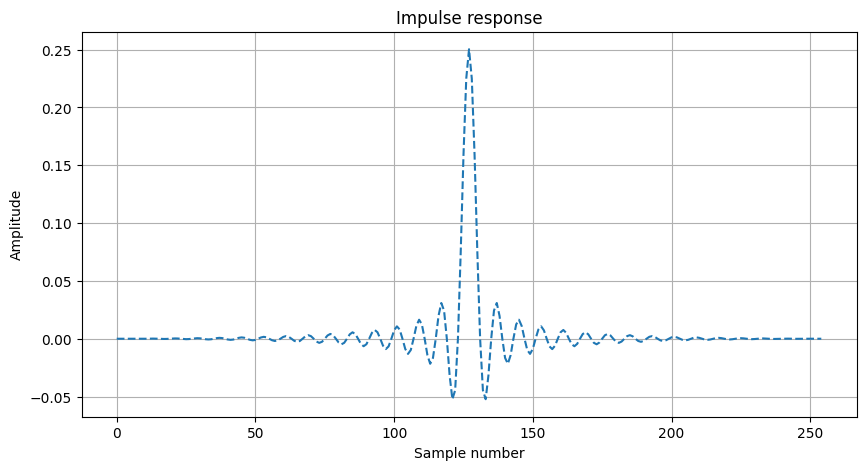

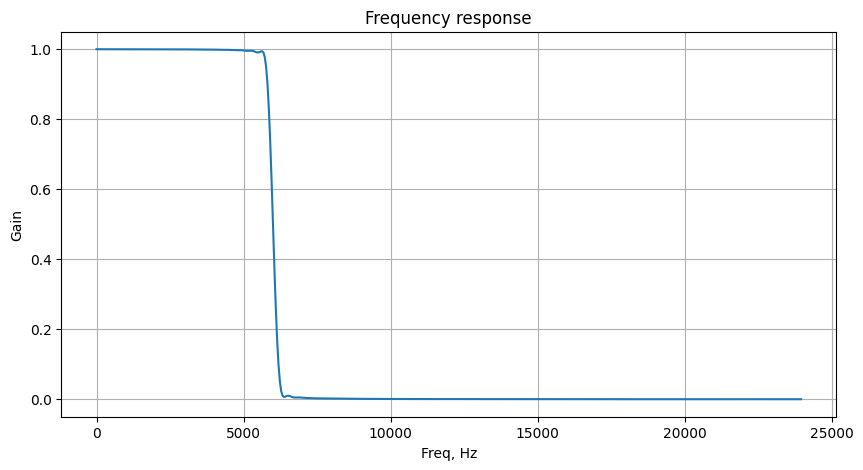

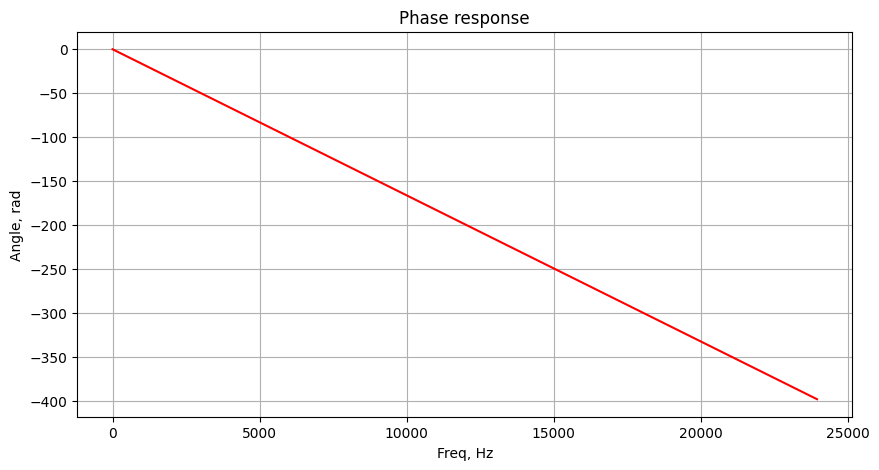

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from scipy import signal

class Coefficients:
    taps = []

    def Generate(fs, fc, N):
        # Compute sinc filter
        nyquistFreq = fs / 2
        cutoffNormalized = fc / nyquistFreq
        h = np.sinc(cutoffNormalized * (np.arange(N) - (N - 1) / 2))

        # Apply window
        # h *= signal.windows.boxcar(int(N))
        # h *= signal.windows.blackman(int(N))
        h *= signal.windows.barthann(int(N))

        # Normalize to get unity gain
        h /= np.sum(h)

        # The CMSIS FIR requires the coefficients to be in time reversed order
        h = np.flip(h)

        return h
    
    def Evaluate(taps, fs):
        # Compute the frequency response of the filter
        nyquistFreq = fs / 2
        w, h = signal.freqz(taps)

        # Convert frequency to Hz
        freqHz = w * nyquistFreq / np.pi

        # Impulse response
        plt.figure(figsize=(10, 5))
        plt.plot(taps, '--')
        plt.grid()
        plt.title('Impulse response')
        plt.ylabel('Amplitude')
        plt.xlabel('Sample number')
        plt.show()        

        # Frequency response
        plt.figure(figsize=(10, 5))
        plt.plot(freqHz, abs(h))
        plt.grid()
        plt.title('Frequency response')
        plt.ylabel('Gain')
        plt.xlabel('Freq, Hz')
        plt.show()

        # Phase response
        plt.figure(figsize=(10, 5))
        anglesRad = (np.unwrap(np.angle(h)))
        plt.plot(freqHz, anglesRad, color='red')
        
        plt.grid()
        plt.title('Phase response')
        plt.ylabel('Angle, rad')
        plt.xlabel('Freq, Hz')
        plt.show()

# UI interraction
def GenerateBtn_ClickEvent(a):
    Coefficients.taps = Coefficients.Generate(sampleRateInput.value, cutoffFrequencyInput.value, filterLength.value)
    for sample in Coefficients.taps:
        print(f'{sample:.8f}', end=',\n')

def EvaluateBtn_ClickEvent(a):
    if Coefficients.taps.__len__() > 0:
        Coefficients.Evaluate(Coefficients.taps, sampleRateInput.value)

GenerateBtn = widgets.Button(center = True, description = "Generate")
GenerateBtn.on_click(GenerateBtn_ClickEvent)
EvaluateBtn = widgets.Button(center = True, description = "Evaluate")
EvaluateBtn.on_click(EvaluateBtn_ClickEvent)
BtnBox = HBox([GenerateBtn, EvaluateBtn])

sampleRateInput = widgets.FloatText(description = 'fs:', value = '48000')
cutoffFrequencyInput = widgets.FloatText(description = 'fc:', value = '6000')
filterLength = widgets.FloatText(description = 'length:', value = '255')
inputBox = VBox([sampleRateInput, cutoffFrequencyInput, filterLength, BtnBox])
display(inputBox)